$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [37]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [38]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [39]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [40]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A,x): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  numerator=np.dot(evalg(x).transpose(),evalg(x))    
  denominator=2*np.dot(np.dot(evalg(x).transpose(),A),evalg(x))
  step_length=numerator/denominator

  
  return step_length

In [41]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p_k=-gradf
  while evalf(x+alpha*p_k)>evalf(x)+gamma*alpha*np.matmul(gradf.T,p_k):
    alpha=rho*alpha

  #print('final step length:',alpha)
  return alpha

In [42]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [52]:
def find_minimizer(start_x, tol, line_search_type, *args):
  global k
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A,x) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    

     #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k


2. [R] Note down the minimizer and minimum function value of h(x)

solution:funaction minimizer: [  8. ,-12.]

minimum function value: 0.0

In [54]:
my_start_x = np.array([1,1])
my_tol= 1e-5



#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,iter = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print( 'funaction minimizer:',x_opt_bls)
print('minimum function value:',evalf(x_opt_bls))
print('number of iterations:',iter)
print('\n----------------------------\n')


#check what happens when you call find_minimzer using backtracking line search
x_opt,iter = find_minimizer(my_start_x, my_tol,  EXACT_LINE_SEARCH)
print('funaction minimizer:',x_opt,'\n minimum function value:',evalf(x_opt))




funaction minimizer: [  8. -12.]
minimum function value: 0.0
number of iterations: 1

----------------------------

funaction minimizer: [  8. -12.] 
 minimum function value: 0.0


#4. [R] Consider stopping tolerance τ = 10^−12 and starting point x0 = (25, 25). Compare the number of iterations taken by the gradient descent procedure which uses exact step length computation against the gradient descent procedure which uses the backtracking line search procedure (with α0 = 1, ρ = 0.5, γ = 0.5). Comment on your observations

#Solution: number of iteration in exact line search and backtraking live search are equal also function minimizer and minimum function value are same 

In [49]:
my_start_x = np.array([25,25])
my_tol= 1e-12
x_opt,iter = find_minimizer(my_start_x, my_tol,  EXACT_LINE_SEARCH)
print('function minimizer:',x_opt,'minimum function value:',evalf(x_opt))
print('number of iteration:',iter)




function minimizer: [  8. -12.] minimum function value: 0.0
number of iteration: 1


In [50]:
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,iter = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print( 'funaction minimizer:',x_opt_bls,'minimum function value:',evalf(x_opt_bls))
print('number of iteration:',iter)





funaction minimizer: [  8. -12.] minimum function value: 0.0
number of iteration: 1


#5. [R] With starting point x0 = (25, 25) and τ = 10^−10, we will now study the behavior of the backtracking line search algorithm for different choices of α0.Take γ = ρ = 0.5. Try α0 ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each α0, record the final minimizer, final objective function value and number of iterations taken by the gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of iterations is plotted against α0 values. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the α0 values. Check and comment if for any α0value, gradient descent with backtracking line search takes lesser number of iterations when compared to thegradient descent procedure with exact line search.

solution: number of iteration increse for first fours  value of a  after that its decreses at the value of a=0.5 after that again its increses in backtacking line search and in exact line search the number of iteration is 1  the function minimizer and minimum function value area equal in both backtraking and exact line search  graetest number of iteration is 1358  when a=0.1 in backtraking line search


In [60]:
number_of_iterations=[]
my_start_x = np.array([25,25])
my_tol= 1e-10
a=np.array([1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])
x_opt,iter = find_minimizer(my_start_x, my_tol,  EXACT_LINE_SEARCH)
print('funaction minimizer:',x_opt,'\n minimum function value:',evalf(x_opt))
print('number_of_iterations:',iter)
for i in a:
#check what happens when you call find_minimzer using backtracking line search
    x_opt_bls,iter = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,i, 0.5,0.5)
    print('alpha value is :',i)
    print( 'funaction minimizer:',x_opt_bls)
    print('minimum function value:',evalf(x_opt_bls))
    print('number of iterations:',iter)
    print('\n-------------------------------------------------------------\n')
    number_of_iterations.append(iter)
print(number_of_iterations)  
  


  


funaction minimizer: [  8. -12.] 
 minimum function value: 0.0
number_of_iterations: 1
alpha value is : 1.0
funaction minimizer: [  8. -12.]
minimum function value: 0.0
number of iterations: 1

-------------------------------------------------------------

alpha value is : 0.9
funaction minimizer: [  8. -12.]
minimum function value: 1.6579714975258972e-21
number of iterations: 12

-------------------------------------------------------------

alpha value is : 0.75
funaction minimizer: [  8. -12.]
minimum function value: 1.3714654556129199e-21
number of iterations: 20

-------------------------------------------------------------

alpha value is : 0.6
funaction minimizer: [  8. -12.]
minimum function value: 2.2038291998576117e-21
number of iterations: 30

-------------------------------------------------------------

alpha value is : 0.5
funaction minimizer: [  8. -12.]
minimum function value: 0.0
number of iterations: 1

-------------------------------------------------------------

al

In [58]:
import matplotlib.pyplot as plt



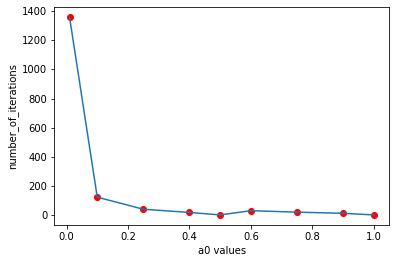

In [61]:
plt.plot(a,number_of_iterations)
plt.scatter(a,number_of_iterations,color='r')
plt.xlabel('a0 values')
plt.ylabel('number_of_iterations')
plt.show()
 
 

#6. [R] With starting point x0 = (25, 25) and τ = 10^-10, we will now study the behavior of the backtracking line search algorithm for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈ {0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function value and number of iterations taken by the gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of iterations is plotted against ρ values. Comment on the observations. Comment about the minimizers and objective function values obtained for different choices of the ρ values. Check and comment if for any ρ value,gradient descent with backtracking line search takes lesser number of iterations when compared to the gradient descent procedure with exact line search

solution: number of iteration increse for first three  value of rho  after that its decreses at the value of rho=0.5 after that again its increses in backtacking line search and in exact line search the number of iteration is 1  the function minimizer and minimum function value area equal in both backtraking and exact line search  graetest number of iteration is 1358  when a=0.1 in backtraking line search


In [62]:
number_of_iterations1=[]
my_start_x = np.array([25,25])
my_tol= 1e-10
rho=np.array([0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01])
x_opt,k = find_minimizer(my_start_x, my_tol,  EXACT_LINE_SEARCH)
print('funaction minimizer:',x_opt,'minimum function value:',evalf(x_opt))
print('number_of_iterations:',k)
for i in rho:
#check what happens when you call find_minimzer using backtracking line search
    x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,1,i,0.5)
    print('when rho value is :',i)
    print( 'funaction minimizer:',x_opt_bls)
    print('minimum function value:',evalf(x_opt_bls))
    print('number of iterations:',k)
    print('\n------------------------------------------------------\n')
    number_of_iterations1.append(k)
print('number_of_iterations:',k)

funaction minimizer: [  8. -12.] minimum function value: 0.0
number_of_iterations: 1
when rho value is : 0.9
funaction minimizer: [  8. -12.]
minimum function value: 4.960536411900771e-22
number of iterations: 9

------------------------------------------------------

when rho value is : 0.75
funaction minimizer: [  8. -12.]
minimum function value: 1.0819468296335504e-21
number of iterations: 15

------------------------------------------------------

when rho value is : 0.6
funaction minimizer: [  8. -12.]
minimum function value: 7.844395544174143e-22
number of iterations: 22

------------------------------------------------------

when rho value is : 0.5
funaction minimizer: [  8. -12.]
minimum function value: 0.0
number of iterations: 1

------------------------------------------------------

when rho value is : 0.4
funaction minimizer: [  8. -12.]
minimum function value: 1.1393259623274523e-22
number of iterations: 18

------------------------------------------------------

when rh

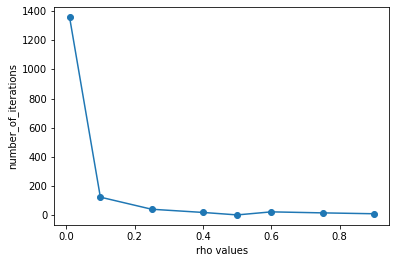

In [63]:
plt.plot(rho,number_of_iterations1)
plt.scatter(rho,number_of_iterations1)
plt.xlabel('rho values')
plt.ylabel('number_of_iterations')
plt.show()